In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [6]:
train_data_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/train.parquet"
train_data_0_path=f"{train_data_path}/partition_id=0/part-0.parquet"
part_0_data=pd.read_parquet(train_data_0_path)
part_0_data

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944205,169,848,19,3.438631,NaN,NaN,NaN,NaN,NaN,-0.028087,...,-0.166964,0.983339,-0.669860,0.272615,-3.676842,-1.221126,1.070584,0.465345,0.207483,0.874975
1944206,169,848,30,0.768528,NaN,NaN,NaN,NaN,NaN,-0.022584,...,-0.352810,0.992615,0.961595,1.089402,0.796034,0.488380,1.846634,-0.088542,-0.008324,-0.153451
1944207,169,848,33,1.354696,NaN,NaN,NaN,NaN,NaN,-0.024804,...,-0.239716,1.701618,0.757672,-5.000000,-3.174266,-1.110790,-3.349107,-0.407801,-0.185842,-0.931004
1944208,169,848,34,1.021797,NaN,NaN,NaN,NaN,NaN,-0.016138,...,-0.442859,-2.036891,-0.064228,1.919665,1.827681,0.872019,3.248694,0.254584,0.090288,0.434726


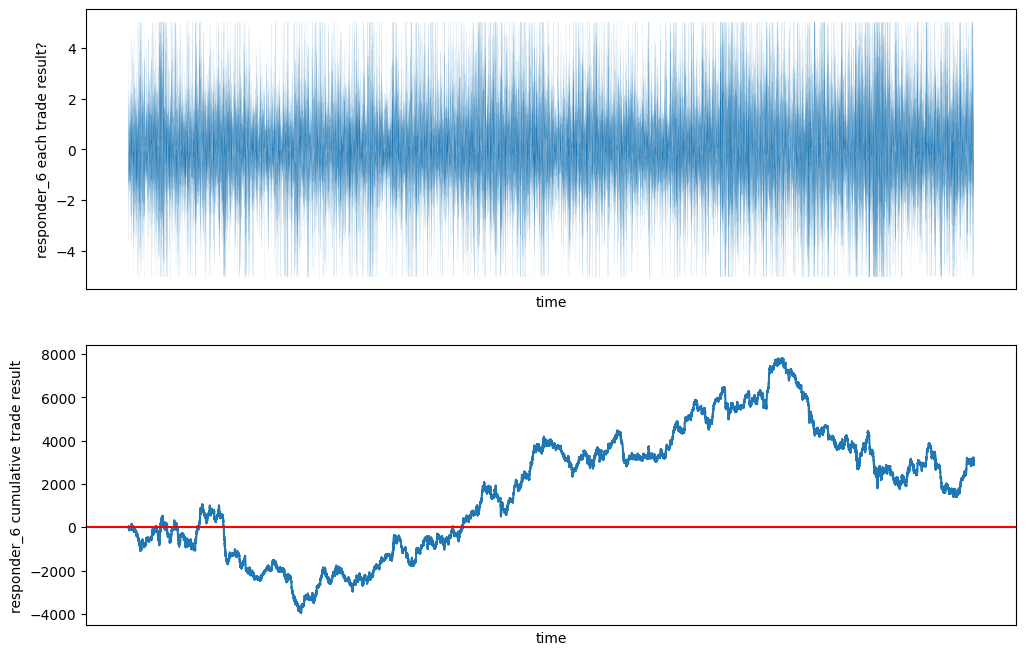

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(part_0_data.index.values, part_0_data["responder_6"], linewidth=0.03)
plt.xticks(())
plt.xlabel("time")
plt.ylabel("responder_6 each trade result?")

plt.subplot(2,1,2)
plt.plot(part_0_data.index.values, part_0_data["responder_6"].cumsum())
plt.xticks(())
plt.axhline(0, color='red', linestyle='-')
plt.xlabel("time")
plt.ylabel("responder_6 cumulative trade result")

plt.show()



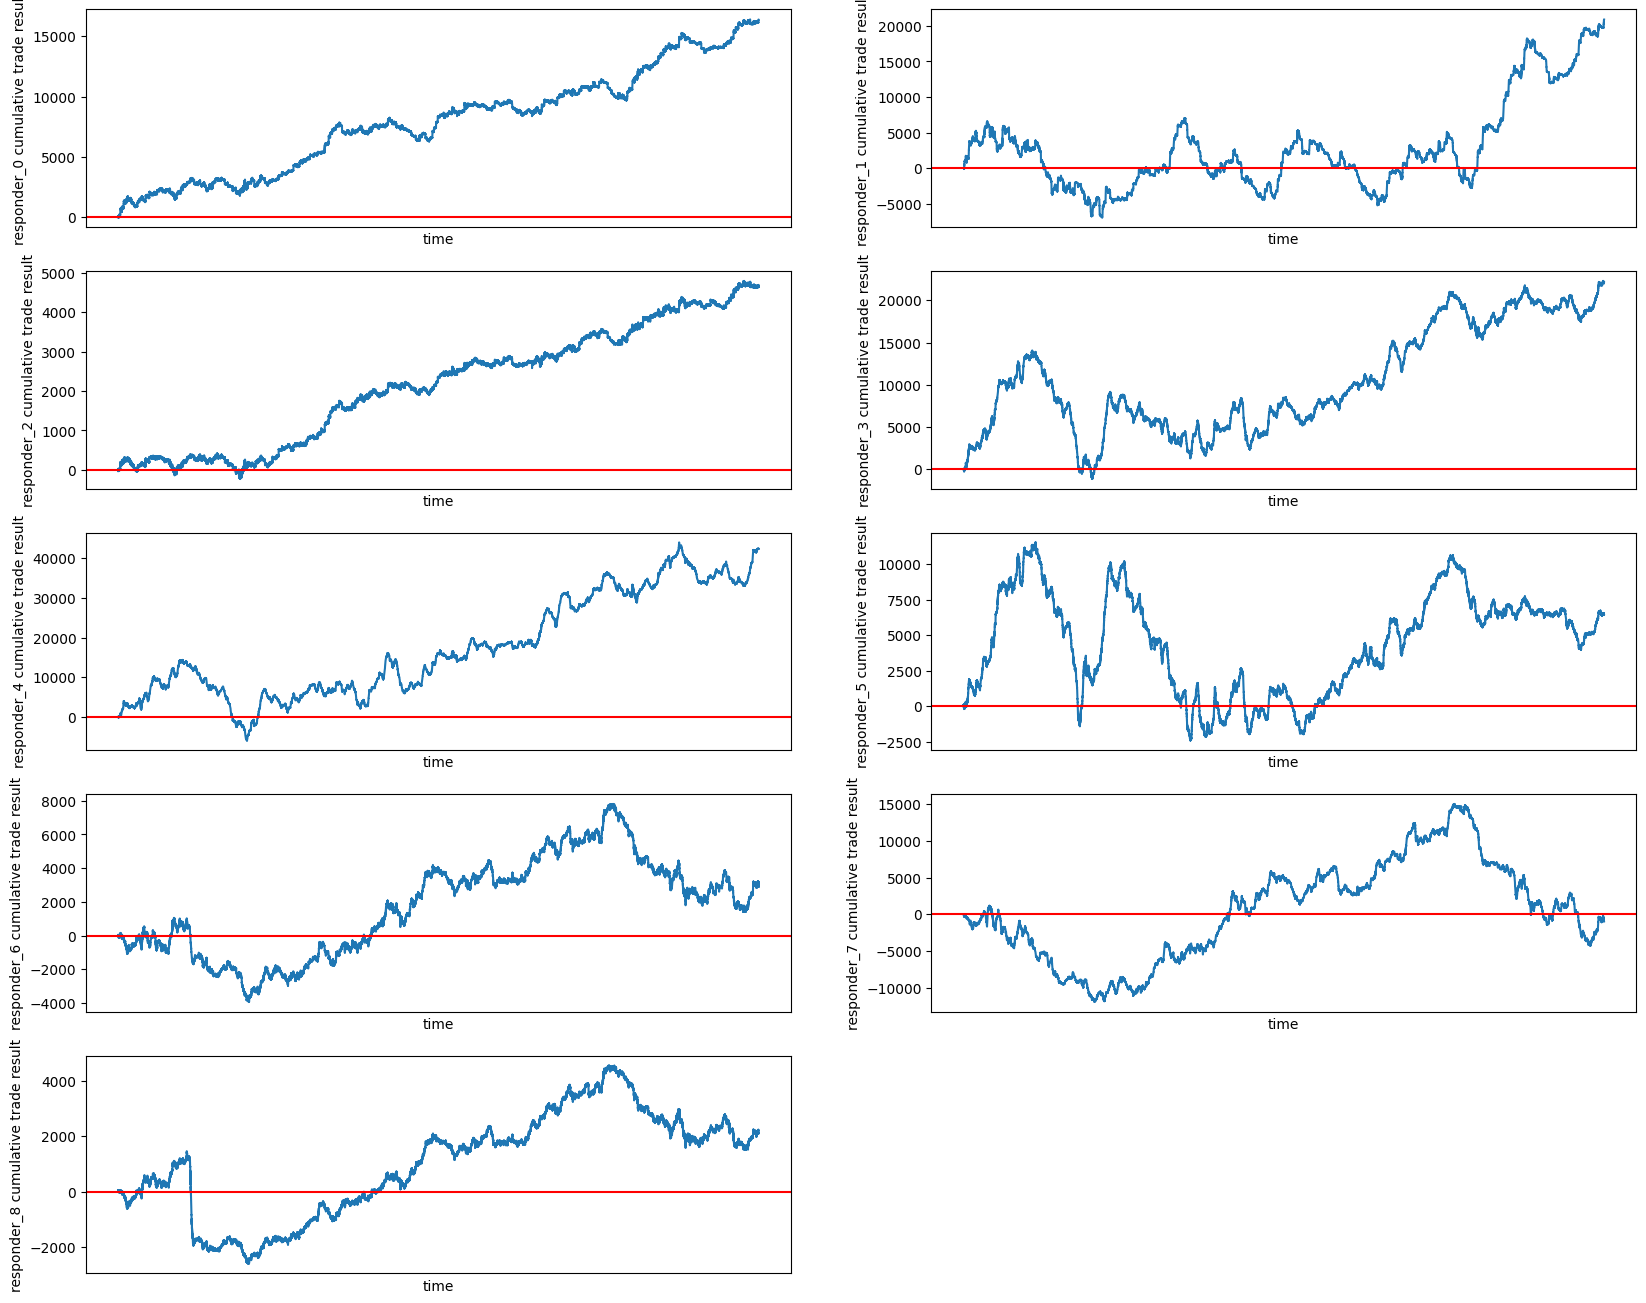

In [34]:
plt.figure(figsize=(20,30))
for i in range(9):
    ith_responder=f"responder_{i}"

    plt.subplot(9,2,i+1)
    plt.plot(part_0_data.index.values, part_0_data[ith_responder].cumsum())
    plt.xticks(())
    plt.axhline(0, color='red', linestyle='-')
    plt.xlabel("time")
    plt.ylabel(f"{ith_responder} cumulative trade result")

plt.show()
